In [9]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns


In [90]:
data = pd.read_csv("http://www.creditriskanalytics.net/uploads/1/9/5/1/19511601/hmeq.csv", header=0, sep=',')

In [62]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [63]:
data.shape

(5960, 13)

In [64]:
data.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

### Understand data business
- Data về thông tin nợ quá hạn của các khoản vay mua nhà 
    * BAD: =1 Hồ sơ vay vi phạm hoặc mât khả năng trả nợ, =0 Hồ sơ vay đã và đang trả nợ 
    * LOAN: Số tiền yêu cầu cho vay 
    * MORTDUE: Số tiền đến hạn của khoản vay thế chấp hiện có 
    * VALUE: Giá trị tài sản hiện có 
    * REASON: Debt: Nợ hợp nhất - HomeImp: Cải thiện nhà 
    * JOB: Công việc hiện tại 
    * YOJ: Số năm kinh nghiệm trong nghề nghiêp hiên tại (Yead Of Job)
    * DEROG: Số lượng báo cáo không tín nhiệm 
    * DELINQ: Số hạn mức tín dụng quá hạn
    * CLAGE" Tuổi quá hạn mức tín dụng cũ nhất tính theo tháng 
    * NINQ: Số câu hỏi tín dụng gần đầy 
    * CLNO: Số hạn mức tín dụng 
    * DEBTINC: Tỷ lệ nợ trên thu nhập 

### Descript

In [65]:
data.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


- Mean of BAD = 0.1994 => 19.94% hồ sơ nợ xấu 

In [66]:
# Visualization distribution of data 

# Bieu do histogram 
def _plot_histogram(x, column, bins=10, use_kde = True):
    x = x.dropna()
    xlabel = "{} bins tickers".format(column)
    ylabel = "Count obs in {} each bin".format(column)
    title = "histogram plot of {} with {} bins".format(column, bins)
    ax = sns.distplot(x, bins=bins, kde=use_kde)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    return ax
    

/home/lehoa/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


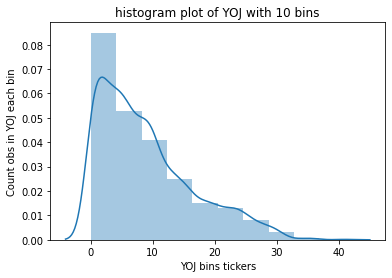

In [67]:
# test
_plot_histogram(data["YOJ"], "YOJ", bins=10, use_kde=True)

In [68]:
# Bieu do barchart 
def _plot_barchart(x, column):
    xlabel = "Group of {}".format(column)
    ylabel = "Count osb in {} each bins".format(column)
    title = "Barchart plot of {}".format(column)
    x = x.fillna("Missing")
    df_x = x.value_counts(dropna=False)
    x_value = df_x.values
    x_index = df_x.index
    ax = sns.barplot(x_index, x_value, order=x_index)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    for label, p in zip(x_value, ax.patches):
        ax.annotate(label, (p.get_x() + 0.25, p.get_height() + 0.25))
    return ax


/home/lehoa/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


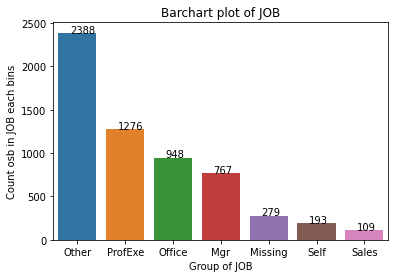

In [69]:
_plot_barchart(data["JOB"], "JOB")

/home/lehoa/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/lehoa/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/lehoa/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

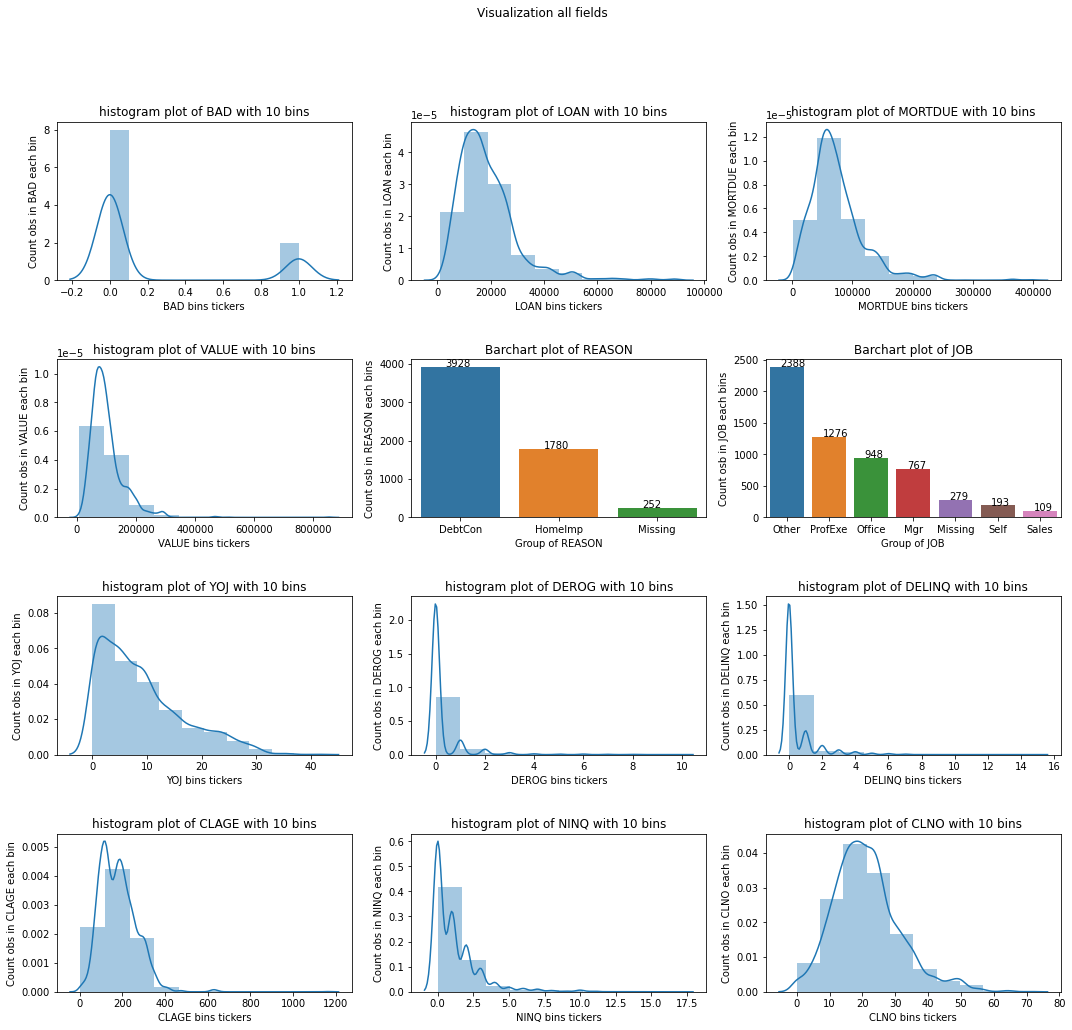

In [70]:
# Khoi tao figure cho do thi (Kich thuoc W*H = 16*12) cach nhau 0.2 giua cac do thi 
fig = plt.figure(figsize=(18,16))
fig.subplots_adjust(hspace=0.5, wspace=0.2)

# Tao vong for check dinh dang cua bien va visualize
for i, (column, dtype) in enumerate(zip(data.columns, data.dtypes.values)):
    if i<=11:
        ax_i = fig.add_subplot(4, 3, i+1)
        if dtype in ['float64', 'int64']:
            ax_i = _plot_histogram(data[column], column)
        else: 
            ax_i = _plot_barchart(data[column], column)
fig.suptitle("Visualization all fields")
plt.show()

### Processing Missing Values

In [91]:
# Processing Missing values 
# numeric 
columns_num = []
columns_cat = []
for column in data.columns:
    if data[column].dtype in ["int64", "float64"]:
        columns_num.append(column)
    else: 
        columns_cat.append(column)       

In [92]:
print(columns_num)
print(columns_cat)

['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
['REASON', 'JOB']


In [98]:
data[columns_num] = data[columns_num].apply(lambda x: x.fillna(x.mean()), axis=0)
data[columns_cat] = data[columns_cat].apply(lambda x: x.fillna("Missing"), axis = 0)


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5960 non-null   float64
 3   VALUE    5960 non-null   float64
 4   REASON   5960 non-null   object 
 5   JOB      5960 non-null   object 
 6   YOJ      5960 non-null   float64
 7   DEROG    5960 non-null   float64
 8   DELINQ   5960 non-null   float64
 9   CLAGE    5960 non-null   float64
 10  NINQ     5960 non-null   float64
 11  CLNO     5960 non-null   float64
 12  DEBTINC  5960 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


### Tinh WOE - Weight Of Evidence
- Xep hang suc manh du doan cua cac bien 
- Tao features cho model 


In [100]:
MAX_VAL = 999999999
MIN_VAL = -MAX_VAL

def _bin_table(data, colname, n_bins = 10, qcut = None):
  X = data[[colname, 'BAD']]
  X = X.sort_values(colname)
  coltype = X[colname].dtype

  if coltype in ['float', 'int']:
    if qcut is None:
      try:
        bins, thres = pd.qcut(X[colname], q = n_bins, retbins=True)
        # Thay thế threshold đầu và cuối của thres
        thres[0] = MIN_VAL
        thres[-1] = MAX_VAL
        bins, thres = pd.cut(X[colname], bins=thres, retbins=True)
        X['bins'] = bins
      except:
        print('n_bins must be lower to bin interval is valid!')
    else:
      bins, thres = pd.cut(X[colname], bins=qcut, retbins=True)
      X['bins'] = bins
  elif coltype == 'object':
    X['bins'] = X[colname]

  df_GB = pd.pivot_table(X, 
                index = ['bins'],
                values = ['BAD'],
                columns = ['BAD'],
                aggfunc = {
                    'BAD':np.size
                })

  df_Count = pd.pivot_table(X, 
                index = ['bins'],
                values = ['BAD'],
                aggfunc = {
                    'BAD': np.size
                })
  
  if coltype in ['float', 'int']:
    df_Thres = pd.DataFrame({'Thres':thres[1:]}, index=df_GB.index)
  elif coltype == 'object':
    df_Thres = pd.DataFrame(index=df_GB.index)
    thres = None
  df_Count.columns = ['No_Obs']
  df_GB.columns = ['#BAD', '#GOOD']
  df_summary = df_Thres.join(df_Count).join(df_GB)
  return df_summary, thres

In [101]:
df_summary, thres = _bin_table(data, 'DELINQ', qcut=[MIN_VAL, 2, MAX_VAL])
df_summary

,Thres,No_Obs,#BAD,#GOOD
bins,,,,
"(-999999999, 2]",2,5663,4674,989
"(2, 999999999]",999999999,297,97,200


In [102]:
thres

array([-999999999,          2,  999999999])